In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd

In [2]:
data = pd.read_csv("listings.csv") 

/home/riccardo/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#convert to float the prices
def convert_to_float(value):
    # remove ","
    string = value[1:].replace(",","")
    return float(string)

data['price'] = data['price'].apply(lambda x: convert_to_float(x))
       

In [4]:
print("\n".join(data.columns))

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

In [ ]:
'bathrooms', 'bedrooms', 'room_type'

In [ ]:
'number_of_reviews'

In [53]:
# remove Nan
clean_data = data[['price', 'bathrooms', 'bedrooms', 'latitude', 'longitude']].dropna()

In [89]:
# add squared coord

y = np.log(clean_data['price'].values+1)
x = clean_data[['bathrooms', 'bedrooms','latitude', 'longitude']].values
x = np.hstack([x, (clean_data['latitude'].values**2).reshape((-1,1)),
               (clean_data['longitude']**2).values.reshape((-1,1)) ])

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize

x = normalize(x, axis=0)

reg = LinearRegression(normalize=False, fit_intercept=True).fit(x, y)
print(reg.score(x, y))
print(reg.coef_)
print(reg.intercept_)

0.2824133719327634
[ 3.05321160e+01  6.08903975e+01  1.12069223e+08  3.24876228e+05
 -5.60373262e+07 -1.62140226e+05]
-397292.2146683406


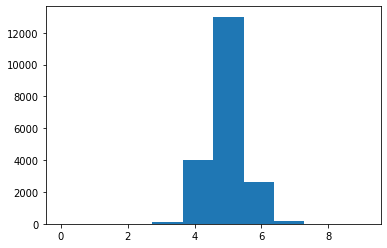

In [78]:
import matplotlib.pyplot as plt

plt.hist(y)
plt.show()